<a href="https://colab.research.google.com/github/chrisrichardson/FEMexamples/blob/main/Gmsh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip3 install gmsh
import sys
sys.path += ['/usr/local/lib/python3.6/site-packages/gmsh-4.6.0-Linux64-sdk/lib']

  Created wheel for gmsh: filename=gmsh-4.6.0.post3-cp36-none-any.whl size=103929564 sha256=2146a655e3f2cb424776d7d76b1046bceef62a1e79c83aef325be17e7f07b624
  Stored in directory: /root/.cache/pip/wheels/5e/27/b4/ab2a2f6cb3e71cea5360f458b543829fb353161b172c1d5dfd
Successfully built gmsh


In [2]:
import gmsh

In [179]:
gmsh.initialize()
gmsh.option.setNumber("Mesh.CharacteristicLengthMin", 0.15) 
gmsh.option.setNumber("Mesh.CharacteristicLengthMax", 0.15) 
gmsh.option.setNumber("Mesh.Algorithm", 6) 
gmsh.model.add("tube")
cylinder1 = gmsh.model.occ.addCylinder(-8,0,0, 6,0,0,3.0)
cylinder2 = gmsh.model.occ.addCylinder(-9,0,0, 9,0,0, 1.0)
gmsh.model.occ.cut([(3, 1)], [(3, 2)], 3)
gmsh.model.occ.synchronize()
gmsh.model.mesh.generate()
el_type, el_tags, node_tags = gmsh.model.mesh.getElements(2)
# print(gmsh.model.mesh.getElementProperties(el_type[0]))
nd = gmsh.model.mesh.getNodes()
# print(node_tags)
triangles = node_tags[0].reshape(-1, 3) - 1
xyz = nd[1].reshape(-1, 3)

/usr/local/lib/python3.6/dist-packages/numpy/ctypeslib.py:523: RuntimeWarning: A builtin ctypes object gave a PEP3118 format string that does not match its itemsize, so a best-guess will be made of the data type. Newer versions of python may behave correctly.
  return array(obj, copy=False)


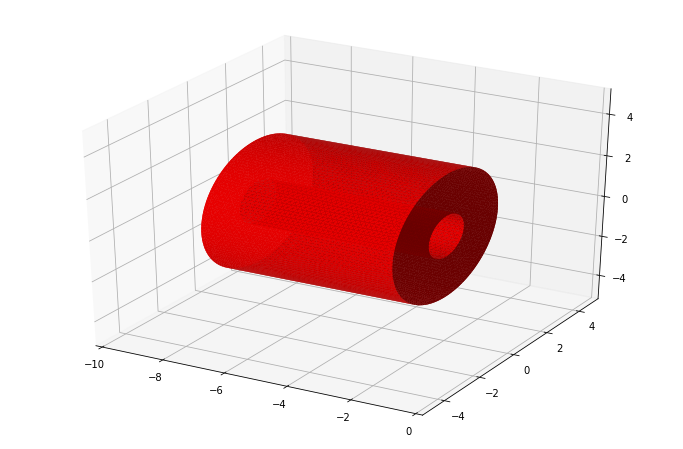

In [180]:
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
ax = plt.axes(projection='3d')
ax.plot_trisurf(xyz[:,0], xyz[:,1], xyz[:,2], triangles=triangles,
                color='red');

ax.set_xlim(-10, 0); ax.set_ylim(-5, 5); ax.set_zlim(-5, 5);